# IST 652:  Homework 1: Structured data processing
### Solutions from a modified version of Jennifer Mead's homework

### Data: Changes in Seattle's climate over time.

Data source
* https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017/downloads/did-it-rain-in-seattle-19482017.zip/1
* This data has  more than 4000 rows and I will show you how to process all of it.

Assignment
1. Read the data in from the file
2. Put it in a list, dictionary, or dataframe
3. Clean the data as necessary
4. Answer at least two questions about the data. The questions must look at a different level of granularity than in the file. Graphing is optional

In [5]:
import csv  # to read in the file
import pandas as pd  #to handle dataframes
import matplotlib.pyplot as plt # to do basic charts

In [22]:

infile = 'SeattleWeather.csv'

# create new empty list
rainList = []

with open(infile, 'r') as csvfile:
    # the csv file reader returns a list of the csv items on each line
    rainReader = csv.reader(csvfile, delimiter=',')

    # put each line in a dictionary
    for line in rainReader:
      # skip lines without useful data
      if line[0] == '' or line[0].startswith('DATE'):
          continue
      else:
          try:
            day = {}
            day['DATE'] = line[0]
            day['PRCP'] = line[1]
            day['TMAX'] = line[2]
            day['TMIN'] = line[3]
            day['RAIN'] = line[4]

            # add this day to the list
            rainList.append(day)

          except IndexError:
            print ('Error: ', line)
            
csvfile.close()

In [23]:
print ("Read", len(rainList), "days of data")
print(rainList)

Read 25551 days of data
[{'DATE': '1948-01-01', 'PRCP': '0.47', 'TMAX': '51', 'TMIN': '42', 'RAIN': 'TRUE'}, {'DATE': '1948-01-02', 'PRCP': '0.59', 'TMAX': '45', 'TMIN': '36', 'RAIN': 'TRUE'}, {'DATE': '1948-01-03', 'PRCP': '0.42', 'TMAX': '45', 'TMIN': '35', 'RAIN': 'TRUE'}, {'DATE': '1948-01-04', 'PRCP': '0.31', 'TMAX': '45', 'TMIN': '34', 'RAIN': 'TRUE'}, {'DATE': '1948-01-05', 'PRCP': '0.17', 'TMAX': '45', 'TMIN': '32', 'RAIN': 'TRUE'}, {'DATE': '1948-01-06', 'PRCP': '0.44', 'TMAX': '48', 'TMIN': '39', 'RAIN': 'TRUE'}, {'DATE': '1948-01-07', 'PRCP': '0.41', 'TMAX': '50', 'TMIN': '40', 'RAIN': 'TRUE'}, {'DATE': '1948-01-08', 'PRCP': '0.04', 'TMAX': '48', 'TMIN': '35', 'RAIN': 'TRUE'}, {'DATE': '1948-01-09', 'PRCP': '0.12', 'TMAX': '50', 'TMIN': '31', 'RAIN': 'TRUE'}, {'DATE': '1948-01-10', 'PRCP': '0.74', 'TMAX': '43', 'TMIN': '34', 'RAIN': 'TRUE'}, {'DATE': '1948-01-11', 'PRCP': '0.01', 'TMAX': '42', 'TMIN': '32', 'RAIN': 'TRUE'}, {'DATE': '1948-01-12', 'PRCP': '0', 'TMAX': '41', '

In [24]:
# Turn the list into a dataframe, re-order the columns, re-name the columns
#from reference https://pbpython.com/pandas-list-dict.html
# df = df[['account', 'Jan', 'Feb', 'Mar']]
rain_df = pd.DataFrame.from_dict(rainList)
rain_df = rain_df[['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN']]
rain_df.columns = ['Date', 'Precip', 'MaxTemp', 'MinTemp', 'Rain']
rain_df.head()

,Date,Precip,MaxTemp,MinTemp,Rain
0,1948-01-01,0.47,51,42,TRUE
1,1948-01-02,0.59,45,36,TRUE
2,1948-01-03,0.42,45,35,TRUE
3,1948-01-04,0.31,45,34,TRUE
4,1948-01-05,0.17,45,32,TRUE


In [25]:
rain_df.shape


(25551, 5)

In [44]:
# change the type for all columns that shouldn't be strings
# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# df.astype({'col1': 'int32'}).dtypes
# reference: https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime

rain_df['Date'] =  pd.to_datetime(rain_df['Date'], format='%Y/%m/%d')



rain_df['Date'] 

#pd.to_datetime(rain_df[0], format= '%d/%m/%Y')

#pd.to_datetime('1/5/1948', format='%d%m%Y', errors='ignore')

#rain_df.dtypes

0       1948-01-01
1       1948-01-02
2       1948-01-03
3       1948-01-04
4       1948-01-05
5       1948-01-06
6       1948-01-07
7       1948-01-08
8       1948-01-09
9       1948-01-10
10      1948-01-11
11      1948-01-12
12      1948-01-13
13      1948-01-14
14      1948-01-15
15      1948-01-16
16      1948-01-17
17      1948-01-18
18      1948-01-19
19      1948-01-20
20      1948-01-21
21      1948-01-22
22      1948-01-23
23      1948-01-24
24      1948-01-25
25      1948-01-26
26      1948-01-27
27      1948-01-28
28      1948-01-29
29      1948-01-30
           ...    
25521   2017-11-15
25522   2017-11-16
25523   2017-11-17
25524   2017-11-18
25525   2017-11-19
25526   2017-11-20
25527   2017-11-21
25528   2017-11-22
25529   2017-11-23
25530   2017-11-24
25531   2017-11-25
25532   2017-11-26
25533   2017-11-27
25534   2017-11-28
25535   2017-11-29
25536   2017-11-30
25537   2017-12-01
25538   2017-12-02
25539   2017-12-03
25540   2017-12-04
25541   2017-12-05
25542   2017

In [47]:
# create a new column Month from the Date column
# reference: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month

rain_df['Month'] = pd.DatetimeIndex(rain_df['Date']).month
rain_df['Year'] = pd.DatetimeIndex(rain_df['Date']).year

rain_df = rain_df[['Date', 'Year', 'Month', 'Rain', 'Precip', 'MaxTemp', 'MinTemp']]

In [48]:
# look at counts and means for the columns to see if the data looks like I expect
rain_df.describe()

,Year,Month
count,25551.000000,25551.000000
mean,1982.476694,6.519197
std,20.193095,3.447046
min,1948.000000,1.000000
25%,1965.000000,4.000000
50%,1982.000000,7.000000
75%,2000.000000,10.000000
max,2017.000000,12.000000


In [49]:
# and looking at the string column too
rain_df.describe(include=['object'])

,Rain,Precip,MaxTemp,MinTemp
count,25551,25551,25551,25551
unique,3,208,87,68
top,FALSE,0,50,42
freq,14648,14648,884,1042


In [53]:
rain_df.head(20)

,Date,Year,Month,Rain,Precip,MaxTemp,MinTemp
0,1948-01-01,1948,1,TRUE,0.47,51,42
1,1948-01-02,1948,1,TRUE,0.59,45,36
2,1948-01-03,1948,1,TRUE,0.42,45,35
3,1948-01-04,1948,1,TRUE,0.31,45,34
4,1948-01-05,1948,1,TRUE,0.17,45,32
5,1948-01-06,1948,1,TRUE,0.44,48,39
6,1948-01-07,1948,1,TRUE,0.41,50,40
7,1948-01-08,1948,1,TRUE,0.04,48,35
8,1948-01-09,1948,1,TRUE,0.12,50,31
9,1948-01-10,1948,1,TRUE,0.74,43,34


<function matplotlib.pyplot.show(*args, **kw)>

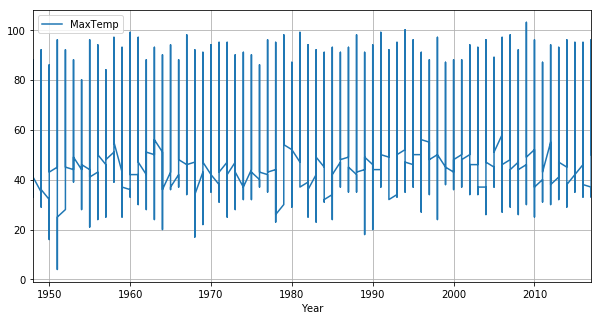

In [71]:
rain_df['MaxTemp'] = pd.to_numeric(rain_df['MaxTemp'])
rain_df['MinTemp'] = pd.to_numeric(rain_df['MinTemp'])


rain_df.plot(x= 'Year', y = ['MaxTemp'], figsize=(10,5), grid=True)
plt.show

# Not a very nice plot

In [56]:
rain_df.set_index('Month').stack()

Month         
1      Date       1948-01-01 00:00:00
       Year                      1948
       Rain                      TRUE
       Precip                    0.47
       MaxTemp                     51
       MinTemp                     42
       Date       1948-01-02 00:00:00
       Year                      1948
       Rain                      TRUE
       Precip                    0.59
       MaxTemp                     45
       MinTemp                     36
       Date       1948-01-03 00:00:00
       Year                      1948
       Rain                      TRUE
       Precip                    0.42
       MaxTemp                     45
       MinTemp                     35
       Date       1948-01-04 00:00:00
       Year                      1948
       Rain                      TRUE
       Precip                    0.31
       MaxTemp                     45
       MinTemp                     34
       Date       1948-01-05 00:00:00
       Year                      19

<function matplotlib.pyplot.show(*args, **kw)>

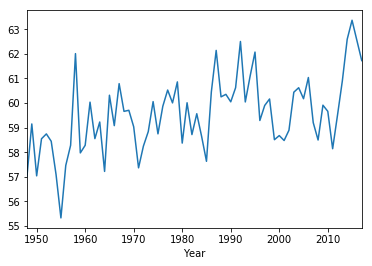

In [72]:
# Does the average maximum temperature appear to be increasing over time?

monthly_precip = rain_df.groupby(['Year'])['MaxTemp'].mean()
monthly_precip

monthly_precip.plot(x = 'Year', y = 'MaxTemp')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

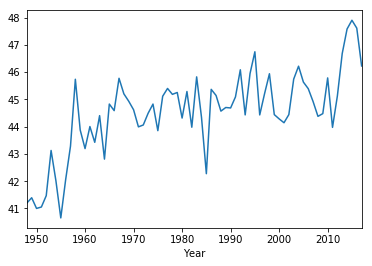

In [74]:
# Does the average minimum temperature appear to be increasing over time?

monthly_precip = rain_df.groupby(['Year'])['MinTemp'].mean()
monthly_precip

monthly_precip.plot(x = 'Year', y = 'MinTemp')
plt.show